# Praktikum Minggu 12 PCVK
* Nama: Aido Luthfi Al Hakim
* Kelas: 3A TI
* NIM: 2141720136
* Absen: 06


Kelompok:
- Aido Lutfhi AL Hakim | 2141720136
- Jauhar Maulana A'la | 2141720186
- Naufal Falah Wafiuddin | 2141720129

Link GitHub : https://github.com/luthf-ai/seni_komputer


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load image
image_names = ['jokowi.jpg', 'kartini.jpg', 'mycat.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']
images = [cv.imread('Face Detection/'+name) for name in image_names]

Number of faces detected: 1


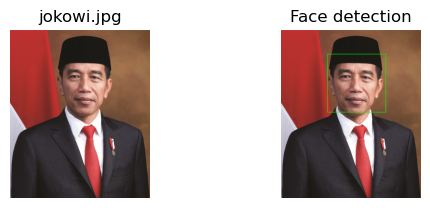

Number of faces detected: 1


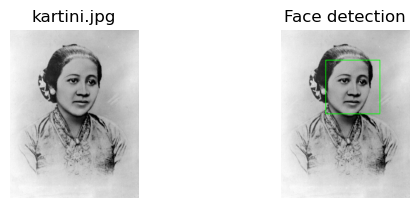

Number of faces detected: 0


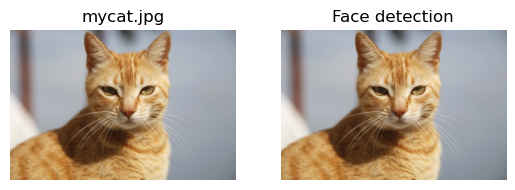

Number of faces detected: 5


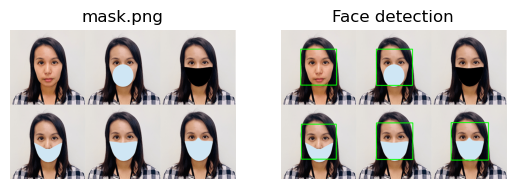

Number of faces detected: 1


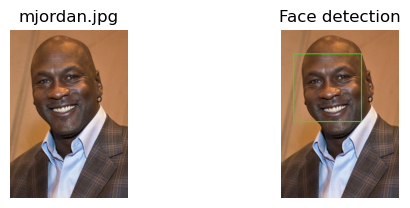

Number of faces detected: 28


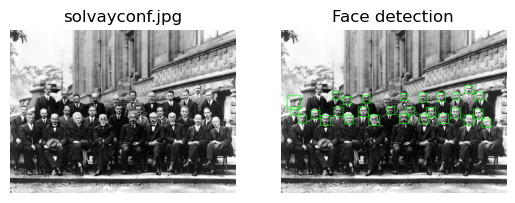

In [4]:
# Face detection
face_cascade = cv.CascadeClassifier('Face Detection/haarcascade_frontalface_alt.xml')
for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    output = images[i].copy()
    print('Number of faces detected:', len(faces))
    for (x,y,w,h) in faces:
        cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
    plt.subplot(2,2,1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(image_names[i])
    plt.axis('off')
    plt.subplot(2,2,2)
    plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
    plt.title('Face detection')
    plt.axis('off')
    plt.show()

Number of cats detected: 1


(-0.5, 599.5, 399.5, -0.5)

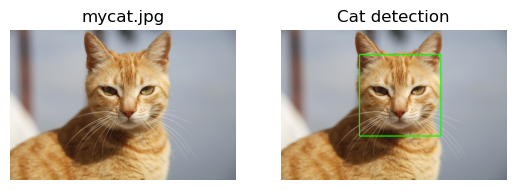

In [4]:
cat_cascade = cv.CascadeClassifier('Face Detection/haarcascade_frontalcatface.xml')
gray = cv.cvtColor(images[2], cv.COLOR_BGR2GRAY)
output = images[2].copy()
cats = cat_cascade.detectMultiScale(gray, 3, 5)
print('Number of cats detected:', len(cats))
for (x,y,w,h) in cats:
    cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(images[2], cv.COLOR_BGR2RGB))
plt.title(image_names[2])
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Cat detection')
plt.axis('off')

Number of eyes detected: 2


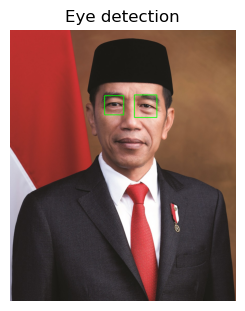

In [5]:
eye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_eye.xml')
jokowi = images[0].copy()
gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
output = jokowi.copy()
eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
print('Number of eyes detected:', len(eyes))
for (x,y,w,h) in eyes:
    cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Eye detection')
plt.axis('off')
plt.show()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

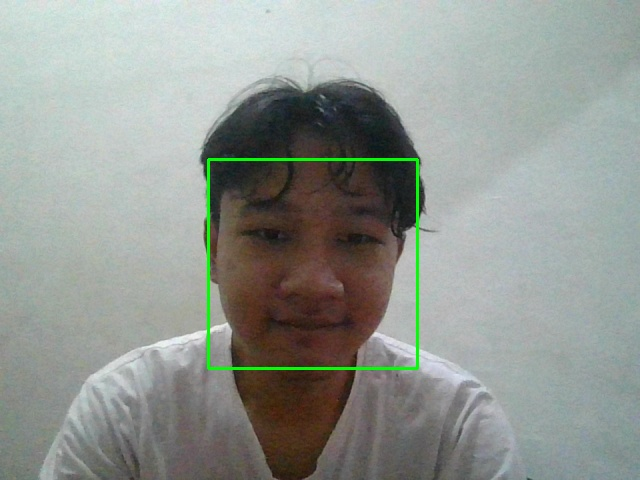

In [ ]:
from IPython.display import display, Image
import ipywidgets as widgets
import threading

stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

cap = cv.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray)
#     output = frame.copy()
#     for (x,y,w,h) in faces:
#         cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
#     cv.imshow('Face detection', output)
#     if cv.waitKey(1) & 0xFF == ord('q'):
#         break

def view(button):
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray)
        output = frame.copy()
        for (x,y,w,h) in faces:
            cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
        _, frame = cv.imencode('.jpeg', output)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
display(stopButton)
view(stopButton)
# thread = threading.Thread(target=view, args=(stopButton,))
# thread.start()


Number of faces detected: 1


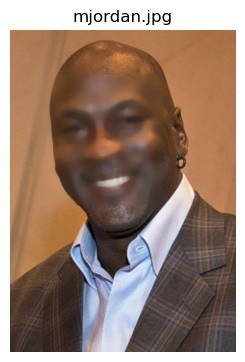

In [5]:
mjordan = images[4].copy()
gray = cv.cvtColor(mjordan, cv.COLOR_BGR2GRAY)
output = mjordan.copy()
face = face_cascade.detectMultiScale(gray)
print('Number of faces detected:', len(face))
for (x,y,w,h) in face:
    face_roi = mjordan[y:y+h, x:x+w]
    blurred_face_roi = cv.medianBlur(face_roi, 15)
    output[y:y+h, x:x+w] = blurred_face_roi
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title(image_names[4])
plt.axis('off')
plt.show()

Number of faces detected: 9


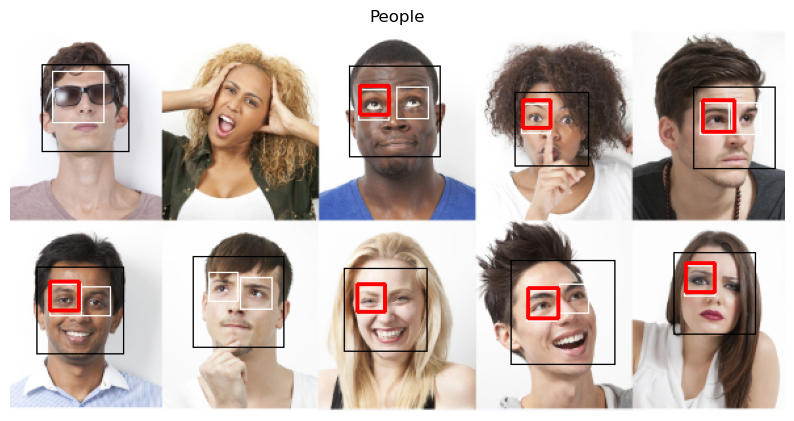

In [6]:
eye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_eye.xml')
righteye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_righteye_2splits.xml')
peoples = cv.imread('Face Detection/people.jpg')
face = face_cascade.detectMultiScale(peoples, 1.02, 10)
print('Number of faces detected:', len(face))
for (x,y,w,h) in face:
    eyes = eye_cascade.detectMultiScale(peoples[y:y+h, x:x+w], 1.03, 15)
    righteyes = righteye_cascade.detectMultiScale(peoples[y:y+h, x:x+w], 1.01, 10)

    for (x1,y1,w1,h1) in eyes:
        cv.rectangle(peoples, (x+x1,y+y1), (x+x1+w1,y+y1+h1), (255,255,255), 1)
    for (x1,y1,w1,h1) in righteyes:
        cv.rectangle(peoples, (x+x1,y+y1), (x+x1+w1,y+y1+h1), (0,0,255), 2)
    
    cv.rectangle(peoples, (x,y), (x+w,y+h), (0,0,0), 1)

    

plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(peoples, cv.COLOR_BGR2RGB))
plt.title('People')
plt.axis('off')
plt.show()

# TUGAS PRAKTIKUM

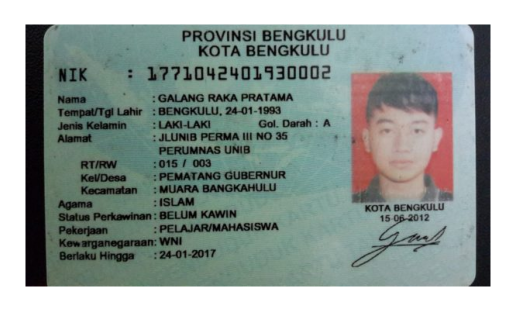

In [2]:
ktp = cv.imread('ktp1.jpeg')
ktp = cv.copyMakeBorder(
	src=ktp,
	top=20,
	bottom=20,
	left=20,
	right=20,
	borderType=cv.BORDER_CONSTANT,
	value=(255, 255, 255))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

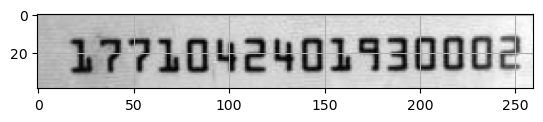

In [4]:
ktp_gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
# ktp_blur = cv.GaussianBlur(
#                 src=ktp_gray,
#                 ksize=(5, 5),
#                 sigmaX=0,
#                 sigmaY=0)
ktp_crop = ktp_gray[61:100, 160:420]
plt.imshow(ktp_crop, cmap='gray')
plt.grid(True)
plt.show()

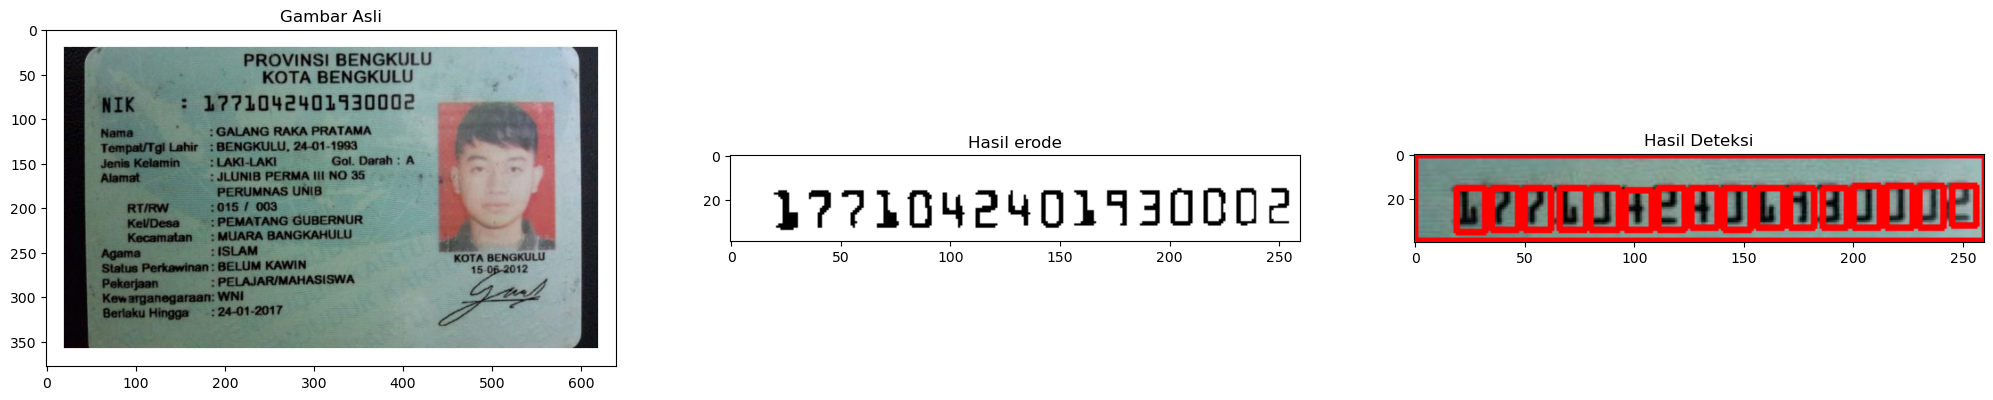

In [16]:
output = ktp[60:100, 160:420].copy()
clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
gray = clahe.apply(ktp_crop)
ret, bw = cv.threshold(gray.copy(), 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# make more clear using closing
kernel = np.ones((2,2), np.uint8)
closing = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel, iterations=1)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=1)
dilate = cv.dilate(opening, kernel, iterations=1)
contours, hierarchy = cv.findContours(dilate.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)



# Ekstraksi kontur
contours, hierarchy = cv.findContours(dilate.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
      cv.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

      # cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
f, axarr = plt.subplots(1, 3, figsize=(25, 8))
axarr[0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(dilate, cmap='gray')
axarr[1].set_title("Hasil erode")
axarr[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
axarr[2].set_title("Hasil Deteksi")
plt.show()

In [11]:
import os
DATADIR = "dataset/training/"
# read all images with names
names = []
images = []
for name in sorted(os.listdir(DATADIR)):
    # remove extension
    image = cv.imread(os.path.join(DATADIR, name))
    images.append(image)
    name = name.split('.')[0]
    names.append(name)

# crop image for each digit in name
# counter = 0
# for i in range(len(images)):
#     name = names[i]
#     gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
#     clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
#     gray = clahe.apply(gray)
#     ret, bw = cv.threshold(gray.copy(), 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#     # make more clear using closing
#     kernel = np.ones((2,2), np.uint8)
#     closing = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel, iterations=1)
#     opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=1)
#     dilate = cv.dilate(opening, kernel, iterations=1)
#     contours, hierarchy = cv.findContours(dilate.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
#     digit_w = gray.shape[1] // len(name)
#     digit_h = gray.shape[0]
#     for cnt in contours:
#         x, y, w, h = cv.boundingRect(cnt)
#         if w <= digit_w and h >= digit_h // 2:
#             digit = dilate[y:y+h, x:x+w]
#             digit = cv.resize(digit, (28, 28))
#             cv.imwrite('dataset/digit/'+str(counter)+'.png', digit)
#             counter += 1

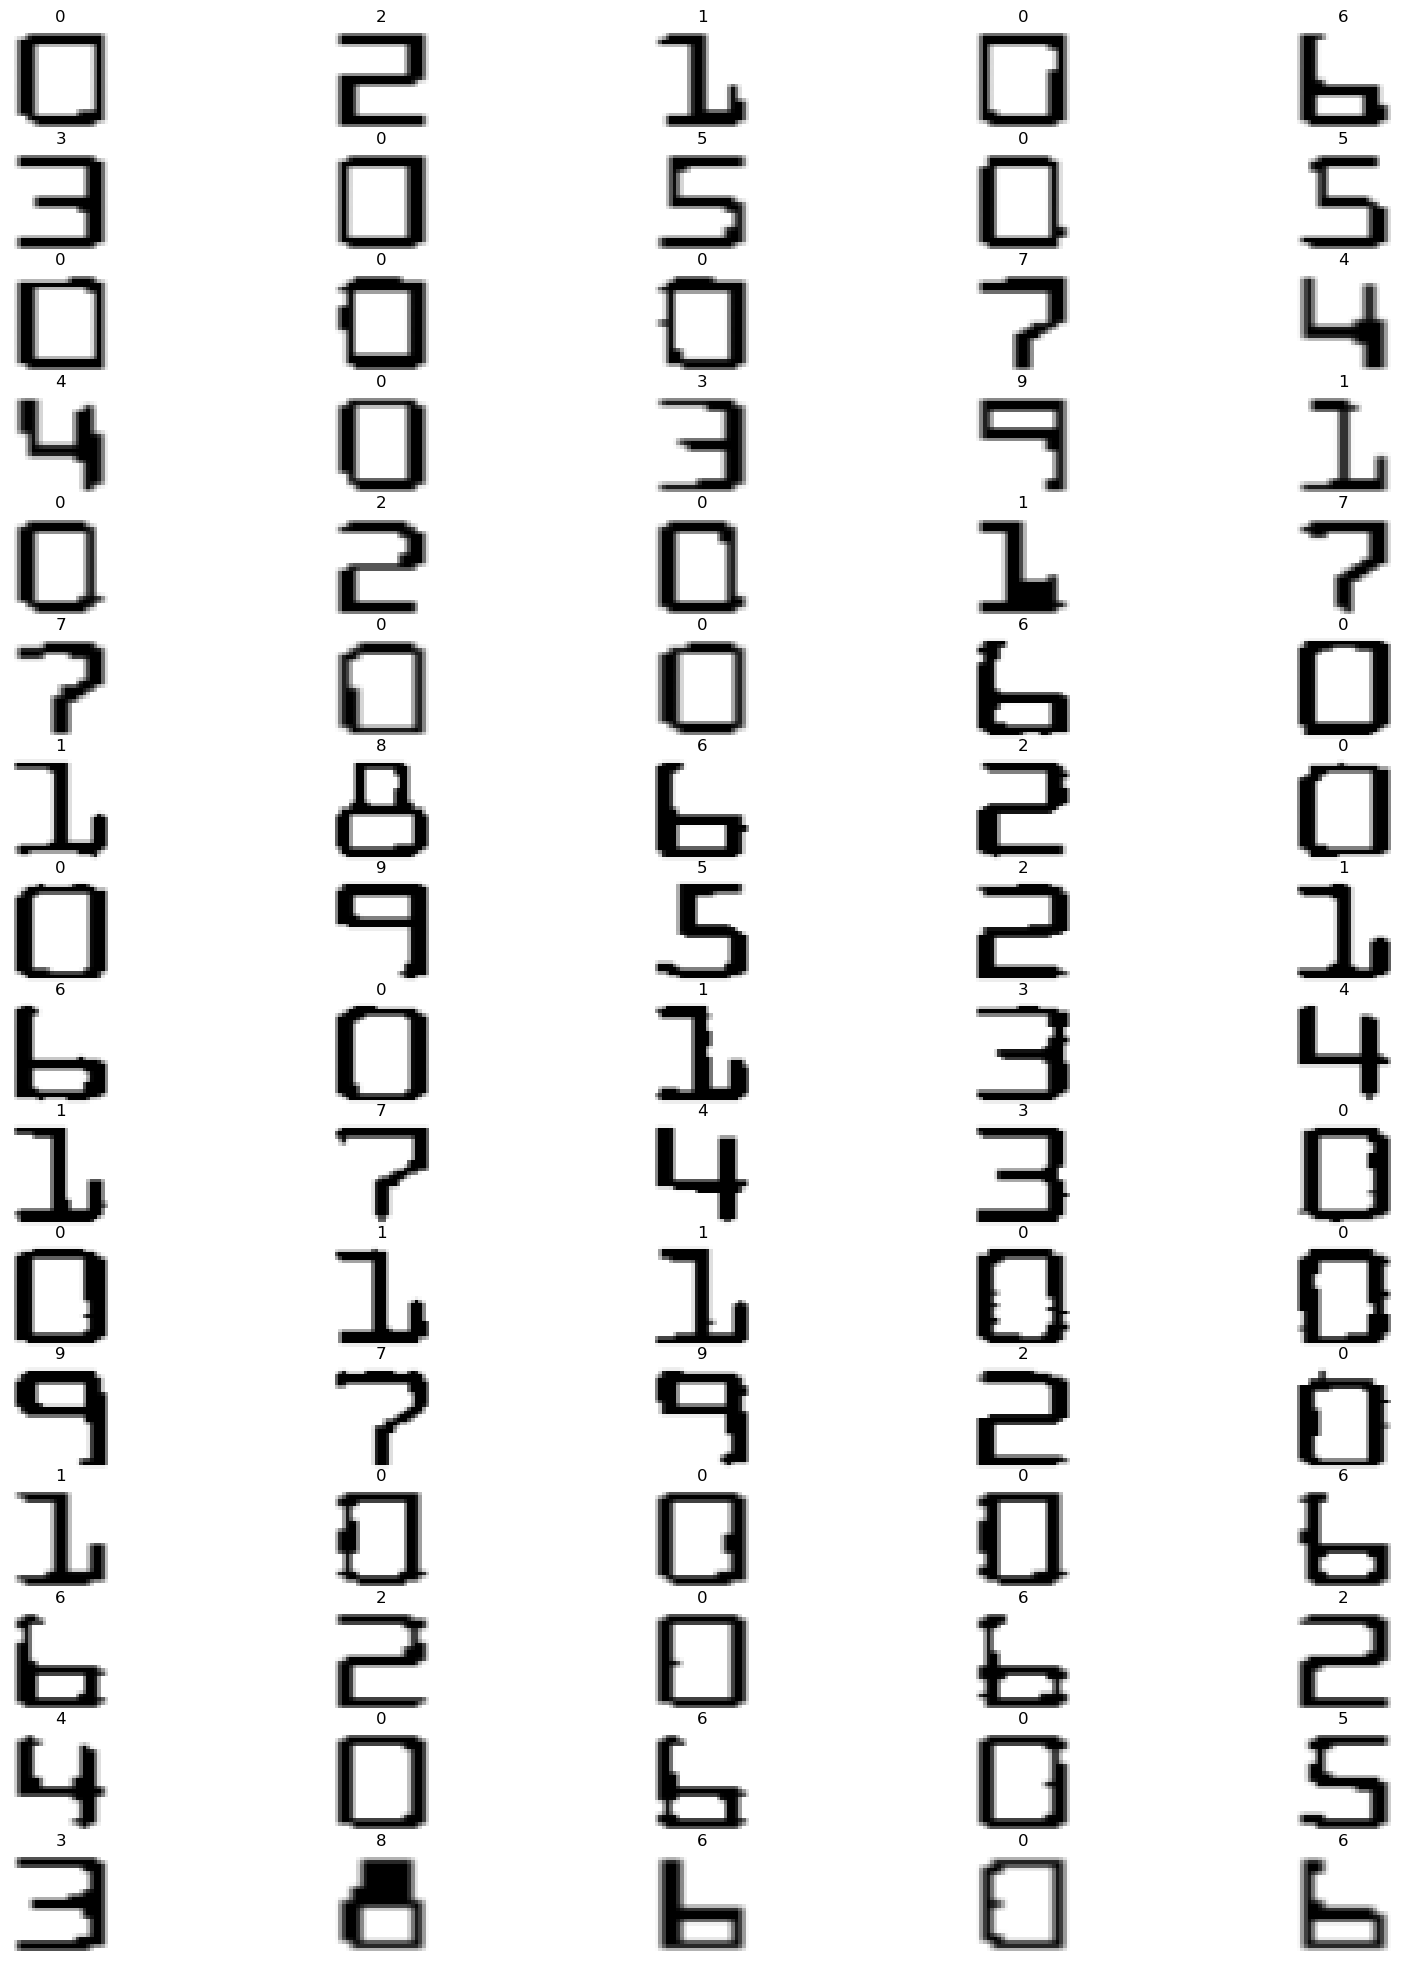

In [7]:
import pandas as pd

label = pd.read_csv('dataset/digit/label.csv', header=None)
digits = [cv.imread("dataset/digit/"+str(num)+'.png',0) for num in range(1,94)]


plt.figure(figsize=(20, 25))
for i in range(80):
    plt.subplot(16, 5, i+1)
    plt.imshow(digits[i+1], cmap='gray')
    plt.title(label[0][i])
    plt.axis('off')
plt.show()

In [8]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle
import tensorflow as tf

training_data = []
for i in range(80):
    training_data.append([digits[i+1], label[0][i]])
    
random.shuffle(training_data)

X = []
Y = []

for data_tuple in training_data:
    resized_image = cv2.resize(data_tuple[0], (28, 28))
    X.append(resized_image)  # Assuming the feature is the first element
    Y.append(data_tuple[1])  # Assuming the label is the second element
    
X = np.array(X).reshape(-1, 28, 28, 1)

# Write to pickle file
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

X.shape

2023-11-19 10:56:42.844968: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 10:56:42.845016: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 10:56:42.845854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 10:56:42.938037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(80, 28, 28, 1)

In [9]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0

width, height = 28, 28

# Input layer
inputs = Input(shape=(width, height, 1))

# Normalization layer
normalized_inputs = BatchNormalization()(inputs)

conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(normalized_inputs)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

flaten = Flatten()(conv_layer)

fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer with 10 units for 10 classes
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.001)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')


2023-11-19 10:56:51.084862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/20


2023-11-19 10:56:52.942547: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-19 10:56:53.144852: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 10:56:53.538550: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 10:56:53.645684: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f20b0003210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 10:56:53.645721: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-19 10:56:53.654564: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-19 10:56:53.800763: I ./tensorflow/compiler/jit/

3/3 [==============================] - 5s 207ms/step - loss: 2.2536 - accuracy: 0.3625
Epoch 2/20
3/3 [==============================] - 0s 8ms/step - loss: 2.0434 - accuracy: 0.4750
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 1.6356 - accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 10ms/step - loss: 1.2229 - accuracy: 0.5625
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: 0.8794 - accuracy: 0.7125
Epoch 6/20
3/3 [==============================] - 0s 8ms/step - loss: 0.5863 - accuracy: 0.9000
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 0.3415 - accuracy: 0.9250
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 0.1921 - accuracy: 0.9625
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1005 - accuracy: 0.9875
Epoch 10/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0471 - accuracy: 0.9875
Epoch 11/20
3/3 [=============================

INFO:tensorflow:Assets written to: anpr.model/assets


1/1 [==============================] - 0s 276ms/step
Predicted Digit for 120450503670001: 4
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 120450503670001: 0
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 120450503670001: 2
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 120450503670001: 1
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 120450503670001: 0
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 120450503670001: 6
1/1 [==============================] - 0s 25ms/step
Predicted Digit for 120450503670001: 3
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 120450503670001: 0
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 120450503670001: 5
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 120450503670001: 0
1/1 [==============================] - 0s 24ms/step
Predicted Digit for 120450503670001: 

/tmp/ipykernel_13238/25600161.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


1/1 [==============================] - 0s 23ms/step
Predicted Digit for 1771042401930002: 2
1/1 [==============================] - 0s 24ms/step
Predicted Digit for 1771042401930002: 0
1/1 [==============================] - 0s 24ms/step
Predicted Digit for 1771042401930002: 1
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 1771042401930002: 7
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 1771042401930002: 7
1/1 [==============================] - 0s 23ms/step
Predicted Digit for 1771042401930002: 1
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 1771042401930002: 0
1/1 [==============================] - 0s 22ms/step
Predicted Digit for 1771042401930002: 0


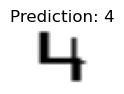

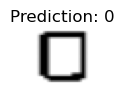

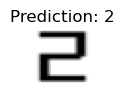

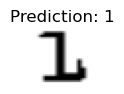

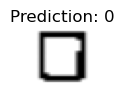

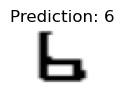

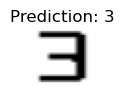

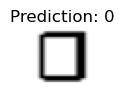

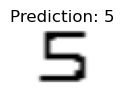

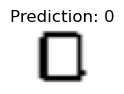

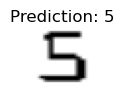

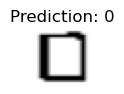

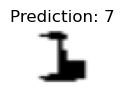

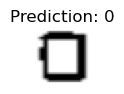

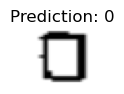

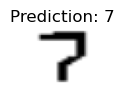

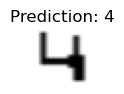

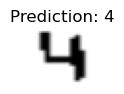

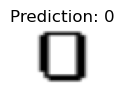

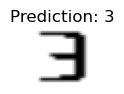

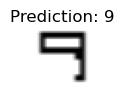

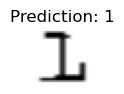

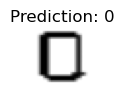

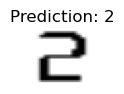

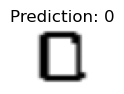

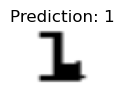

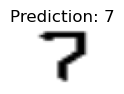

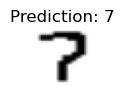

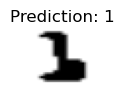

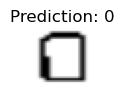

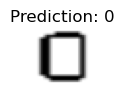

In [12]:
import os
import numpy as np

model = tf.keras.models.load_model("anpr.model")
    
DATADIR = "dataset/testing/"
for name in sorted(os.listdir(DATADIR)):
    # remove extension
    image = cv.imread(os.path.join(DATADIR, name))
    images.append(image)
    name = name.split('.')[0]
    names.append(name)

# crop image for each digit in name
for i in range(2):
    name = names[i]
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
    gray = clahe.apply(gray)
    ret, bw = cv.threshold(gray.copy(), 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    # make more clear using closing
    kernel = np.ones((2,2), np.uint8)
    closing = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel, iterations=1)
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=1)
    dilate = cv.dilate(opening, kernel, iterations=1)
    contours, hierarchy = cv.findContours(dilate.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    digit_w = gray.shape[1] // len(name)
    digit_h = gray.shape[0]
    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        if w <= digit_w and h >= digit_h // 2:
            digit = dilate[y:y+h, x:x+w]
            digit = cv.resize(digit, (28, 28))
            new_array = np.array(digit).reshape(-1, width, height,1)
            new_array = new_array / 255.0
            prediction = model.predict(new_array)
            predicted_digit = np.argmax(prediction)
            # Plot the digit with its prediction
            plt.figure(figsize=(10, 5))
            plt.subplot(1, len(images), i + 1)
            plt.imshow(digit, cmap='gray')
            plt.title(f"Prediction: {predicted_digit}")
            plt.axis('off')

            print(f"Predicted Digit for {name}: {predicted_digit}")

plt.show()

1/1 [==============================] - 0s 20ms/step


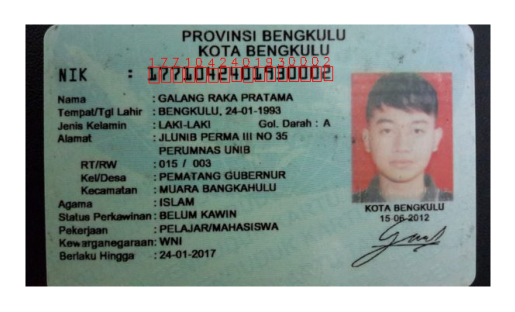

In [45]:
x1 = 160
x2 = 420
y1 = 60
y2 = 100
output = ktp.copy()
clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
gray = clahe.apply(ktp_crop)
ret, bw = cv.threshold(gray.copy(), 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# make more clear using closing
kernel = np.ones((2,2), np.uint8)
closing = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel, iterations=1)
opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=1)
dilate = cv.dilate(opening, kernel, iterations=1)
contours, hierarchy = cv.findContours(dilate.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# predict and add label to image with bounding box
digit_w = gray.shape[1] // 16
digit_h = gray.shape[0]
last_contour = None
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)

    # if too small nor big ignore
    if w >= digit_w and h >= digit_h // 2:
        continue
    # if near/inside other contour ignore
    if last_contour is not None and abs(x - last_contour[0]) < 10:
        continue
    
    last_contour = (x, y, w, h)
    digit = dilate[y:y+h, x:x+w]
    digit = cv.resize(digit, (28, 28))
    new_array = np.array(digit).reshape(-1, width, height,1)
    new_array = new_array / 255.0
    prediction = model.predict(new_array)
    predicted_digit = np.argmax(prediction)
    final_output = cv.rectangle(output, (x1+x,y1+y), (x1+x+w,y1+y+h), (0,0,255), 1)
    cv.putText(final_output, str(predicted_digit), (x1+x-2,y1+y-2), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
plt.imshow(cv.cvtColor(final_output, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
